In [11]:
# 1번 : 데이터 적재
#from sklearn.datasets import load_breast_cancer
#data = load_breast_cancer()
#X,y = data.data, data.target
#X

import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() 
X, y = pd.DataFrame(data.data, columns = data.feature_names), pd.Series(data.target, dtype="category")
# 0과 1이 아닌 이름으로 다시 series 만들어주기 0은 malignant, 1은 benign
y = y.cat.rename_categories(data.target_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
# 2번 : 데이터 전처리
# 결측치가 있는지 확인하기 - 열 별로 NAN이 아닌 갯수 확인 
X.notnull().sum()

# X에서 NAN 값 column 별 평균으로 채우기
X.fillna(X.mean())

# X에서 NAN이 있는 row 삭제
X.dropna()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


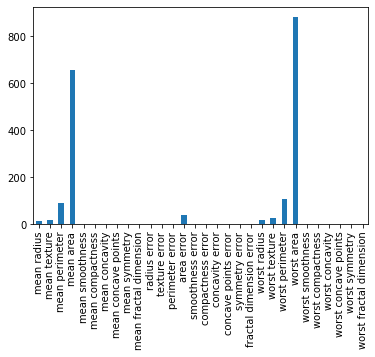

In [55]:
# 3번 : 데이터 특징 파악
X.mean().plot(kind='bar')

#import matplotlib.pyplot as plt
#ax = plt.subplot()
#ax.bar(data.feature_names, X.mean())
#x축에 들어가는 feature들의 이름이 기니까 rotation parameter를 통해 이름 회전시켜주기
#ax.set_xticklabels(data.feature_names, rotation = 90)
#plt.show()

In [56]:
# 4번 : 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
X_train
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
294,12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,...,13.50,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.14020,0.14020,0.10550,0.06499,0.2894,0.07664
65,14.78,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,...,17.31,33.39,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911
32,17.02,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,0.2248,0.06382,...,20.88,32.09,136.10,1344.0,0.16340,0.35590,0.55880,0.18470,0.3530,0.08482
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,20.60,24.13,135.10,1321.0,0.12800,0.22970,0.26230,0.13250,0.3021,0.07987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,0.06020,...,24.19,33.81,160.00,1671.0,0.12780,0.34160,0.37030,0.21520,0.3271,0.07632
87,19.02,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,0.1953,0.05629,...,24.56,30.41,152.90,1623.0,0.12490,0.32060,0.57550,0.19560,0.3956,0.09288
45,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,...,22.82,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.10810,0.24260,0.30640,0.08219,0.1890,0.07796


In [59]:
# 5번 : Decision Tree Classifier
# code from 4번

# Decision Tree 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Decision Tree 분류기 불러오기
clf = DecisionTreeClassifier()
# Decision Tree 학습을 위해 parameter 채우기
clf.fit(X_train,y_train)
# Decision Tree 테스트를 위해 parameter 채우기
pred = clf.predict(X_test)
# accuracy 계산
acc = accuracy_score(y_test, pred)

print("Accuracy : %.3f" % acc)

Accuracy : 0.904


In [60]:
# 6번 : Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest 분류기 불러오기
clf = RandomForestClassifier()
# Random Forest 학습을 위해 parameter 채우기
clf.fit(X_train,y_train)
# Random Forest 테스트를 위해 parameter 채우기
pred = clf.predict(X_test)
# accuracy 계산
acc = accuracy_score(y_test, pred)

print("Accuracy : %.3f" % acc)

Accuracy : 0.956


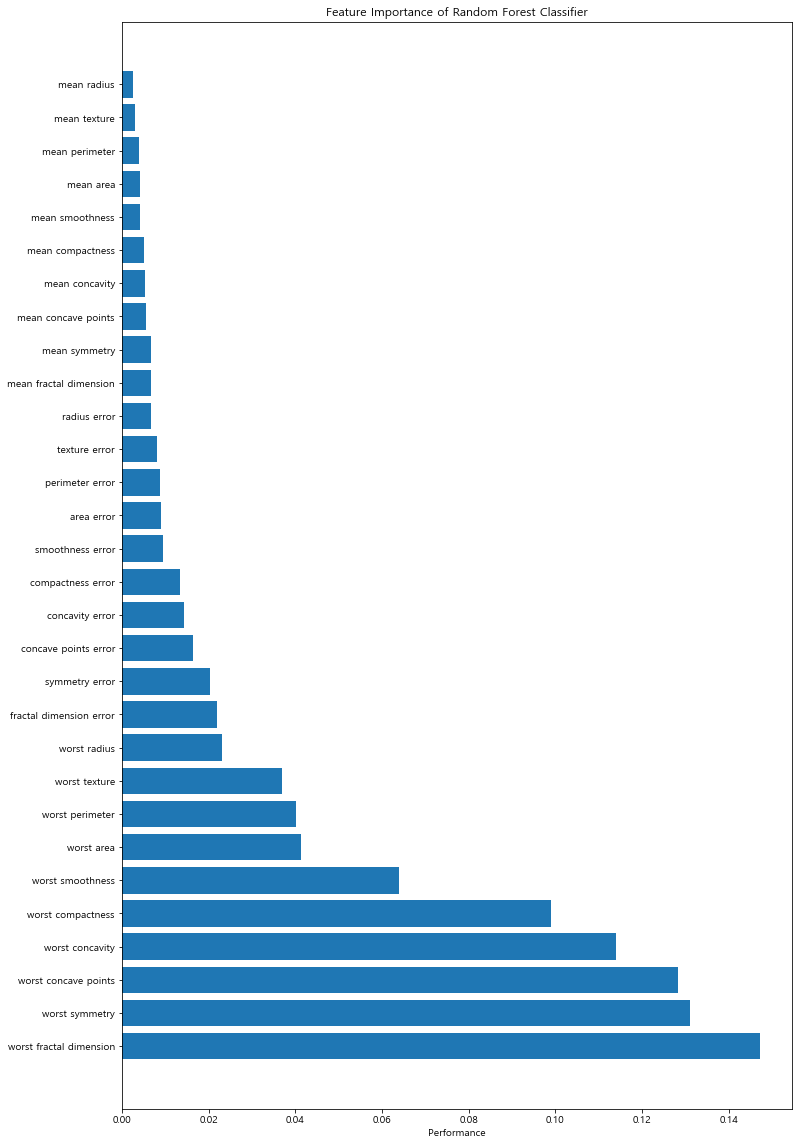

In [97]:
# 7번 : Feature Importance 확인
import matplotlib.pyplot as plt
%matplotlib inline

# code from 6번

fig, ax = plt.subplots(figsize=(12, 20))
# 6번에서 완성 코드를 기준으로 feature importance 불러오기
feature_importances = clf.feature_importances_
#n_feature = X.shape[1]
y_pos = np.arange(len(feature_importances))

ax.barh(y_pos, sorted(feature_importances), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(X.columns)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Feature Importance of Random Forest Classifier')

plt.show()


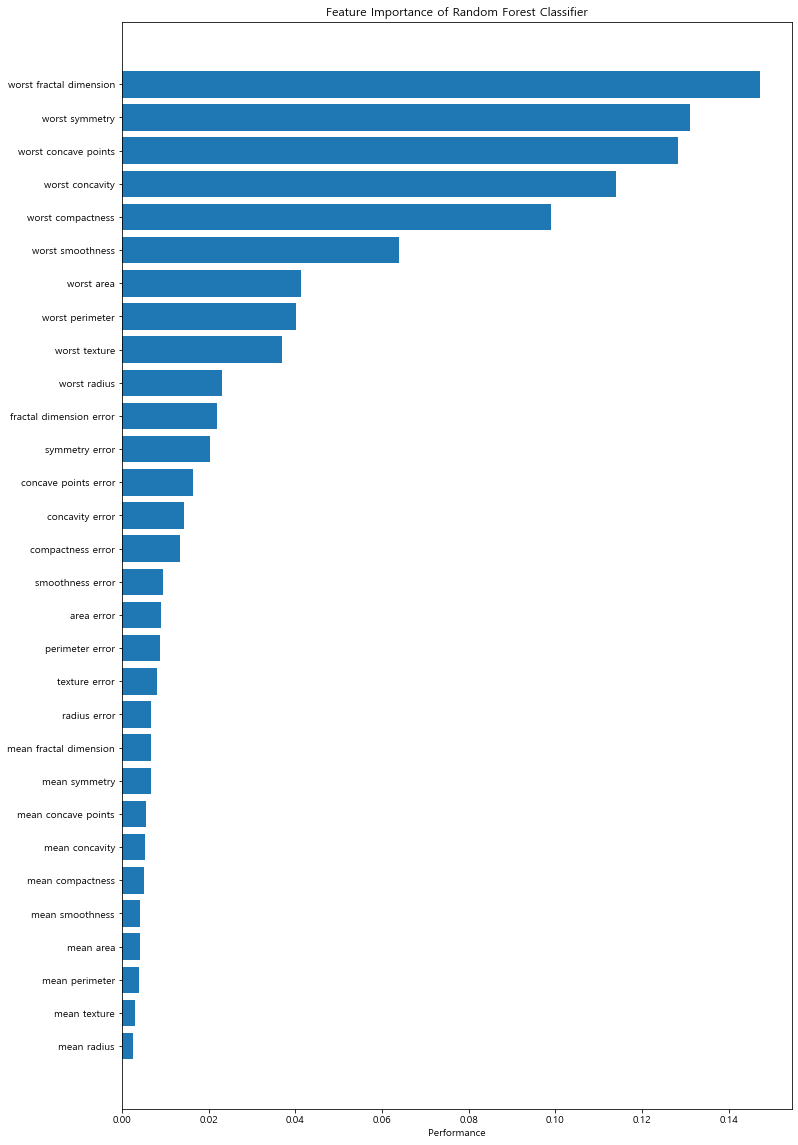

In [115]:
fig, ax = plt.subplots(figsize=(12, 20))
# 6번에서 완성 코드를 기준으로 feature importance 불러오기
feature_importances = clf.feature_importances_

y_pos = np.arange(len(feature_importances))

ax.barh(y_pos, sorted(feature_importances,reverse=True), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(X.columns[::-1])
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Feature Importance of Random Forest Classifier')

plt.show()

C:\Users\user\Anaconda3\envs\mjs\lib\site-packages\ipykernel_launcher.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



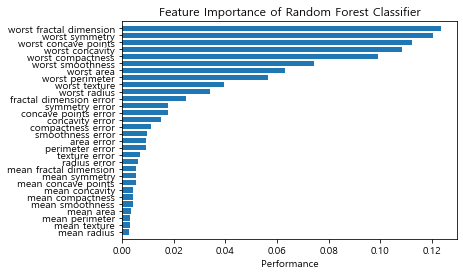

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
y_train = pd.DataFrame(y_train)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)
features = X_train.columns.values
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Performance')
    plt.ylim(-1, n_features)
    plt.title('Feature Importance of Random Forest Classifier')

plot_feature_importances_cancer(rf)
plt.show()

Feature Importance 의 의미와 역할

어떤 특성이 가지(tree)에서 몇번 등장하는지, 혹은 불순도를 얼마나 낮추는 지에 대한 지표입니다. 
쉽게 말해서 트리를 만드는 과정에 어떤 특성이 가장 중요한지 평가하는 것을 말합니다.
이 중요도는 특정 변수가 모델을 구성하는 비율로 측정하는데요, 
각 특성의 중요도는 0~1 사이의 값을 가지고 전체를 합하면 1이 됩니다. 
하지만 이 방법의 단점이 있는데 -영향을 주는 특성을 알수 없다는 것과 
cardinality가 높은 경우 특성의 중요도가 높게 나와 해당 특성을 사용했을 때 모델을 과적합으로 
만들 수 있다는 것입니다.

In [ ]:
#8번: 프로젝트 리뷰
데이터 준비하고 적재하기
데이터 전처리
데이터 특징 파악하기
데이터 분할
- 훈련 데이터 / 테스트 데이터 나누기

학습데이터로 모델 훈련
-훈련시키기

Decision Tree Classifier

-정확도로 결과 예측

Random Forest Classifier

-정확도 결과예측

Feature Importance 확인

-모델성능을 높이는 방법